# Gelatin penetration

{'x': 512, 'y': 512, 'c': 2, 't': 394, 'z': 18}
['z']


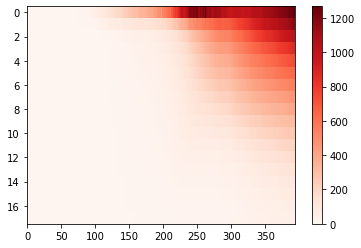

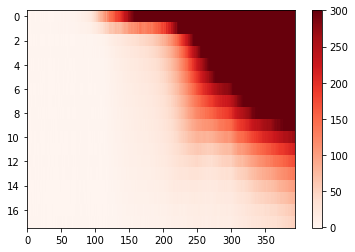

In [19]:
from nd2reader import ND2Reader
import cv2
import matplotlib.pyplot as plt
import numpy as np

with ND2Reader('z-stack movie resonant carvacrol gelatin nile red.nd2') as img:
    

    img.bundle_axes = 'yx'
    img.iter_axes = 'z'
    #print(img.metadata)
    print(img.sizes)
    print(img.iter_axes)
    
    img.default_coords['c'] = 1 #c = 1 ('TRITC')
    
    
    nz = len(img.metadata['z_levels'])
    nt = len(img.metadata['frames'])

    
    array = np.zeros((nz,nt))
    array_bg = np.zeros((nz, 1))
    


    img.default_coords['t'] = 0
    for z in range(nz):
        img_copy = img[z]
        array_bg[z, 0] = img_copy.mean()
        
    for t in range(nt):
        img.default_coords['t'] = t
        for z in range(nz):
            img_copy = img[z]
            img_value = img_copy - array_bg[z, 0]
            array[z, t] = img_value.mean()
    
    
    plt.imshow(array, plt.cm.Reds, aspect='auto')
    plt.colorbar()
    plt.show()
    
    plt.imshow(array, plt.cm.Reds, vmax=300, aspect='auto')
    plt.colorbar()
    plt.show()

# Export to an .xlsx using pandas

In [23]:
import pandas as pd

## convert your array into a dataframe
df = pd.DataFrame (array)

## save to xlsx file

filepath = 'Gelatin nile red penetration.xlsx'

df.to_excel(filepath, index=False)